## MFCC Mel Frequency Cepstral Coefficients
1. Used in different types of audio applications
2. Key objectives
    - Remove vocal fold excitations (F0) - the pitch information
    - Make the extracted features independent
    - Adjust to how humans perciece loudness and frequency of sound
    - Capture the dynamics of phones (The context)

In [4]:
import librosa
import numpy as np
import IPython.display as ipd
from scipy.io import wavfile

import os
import scipy
import scipy.fftpack as fft
from scipy.signal import get_window
import matplotlib.pyplot as plt


In [33]:
audio_data = 'data/NormalSpeech_Spk1_Spk1_s10.wav'

'''
x: Speech signal (1d array)
sr: Sampling rate
'''

x,sr = librosa.load(audio_data, sr=16000, mono=True)
print (type(x))
print(type(sr))

<class 'numpy.ndarray'>
<class 'int'>


Text(0.5, 0, 'time(sec)')

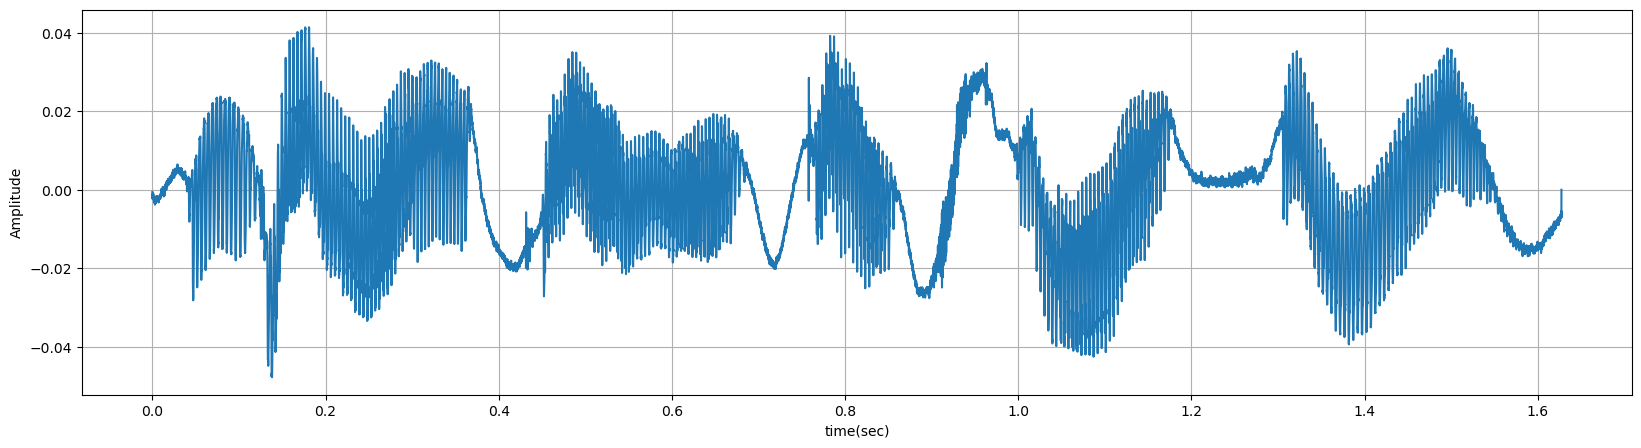

In [34]:
plt.figure(figsize=(20,5))
plt.plot(np.linspace(0,len(x)/sr, num=len(x),),x)
plt.grid(True)
plt.ylabel('Amplitude')
plt.xlabel('time(sec)')


In [35]:
def normalize_audio(audio):
    audio=audio-np.mean(audio)
    audio=audio / np.max(np.abs(audio))
    return audio

Text(0.5, 0, 'time(sec)')

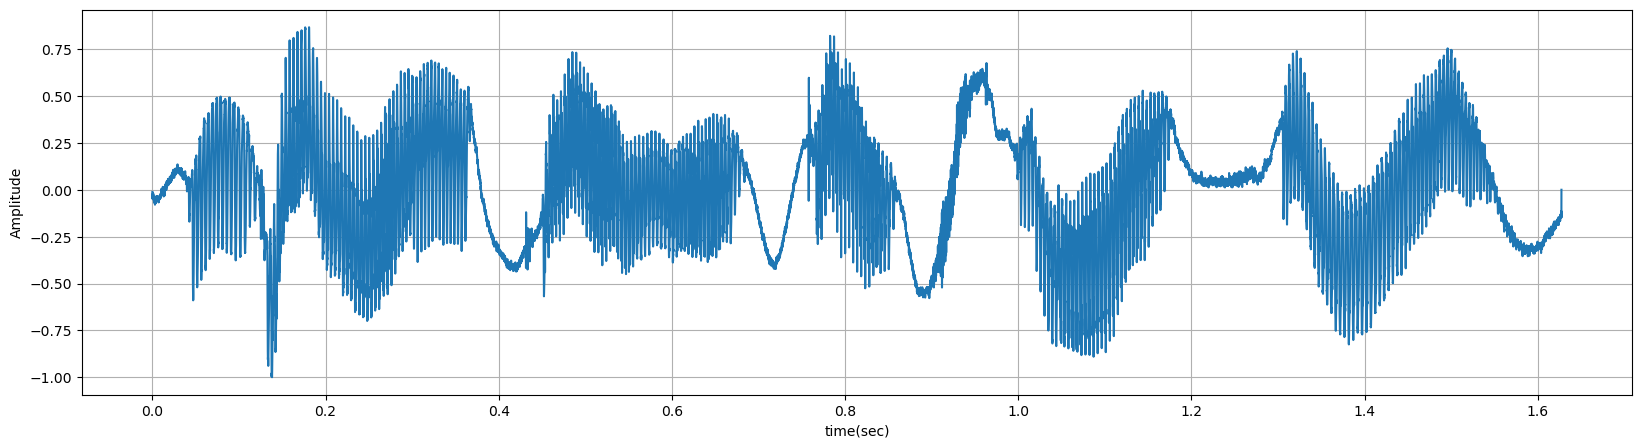

In [36]:
x=normalize_audio(x)

plt.figure(figsize=(20,5))
plt.plot(np.linspace(0,len(x)/sr, num=len(x),),x)
plt.grid(True)
plt.ylabel('Amplitude')
plt.xlabel('time(sec)')

In [39]:
# Remove low varying signal using High pass filter

from scipy.signal import butter, filtfilt

T=round(x.shape[0]/float(sr),2) # sample period
cutoff=50 # desired cutoff frequency of filter, Hz, slightly higher than actual 1.2 Hz
nyq = np.multiply(0.5,sr) # Nyquist frequency
order = 2 # sin wave can be approx represented as quadratic
n=int(np.multiply(T,sr)) # total no of samples

In [40]:
def butter_highpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff/ nyq
    #get the filter coefficients
    b,a = butter(order, normal_cutoff, btype='high', analog=False)
    y=filtfilt(b,a,data)
    return y

26038 26038


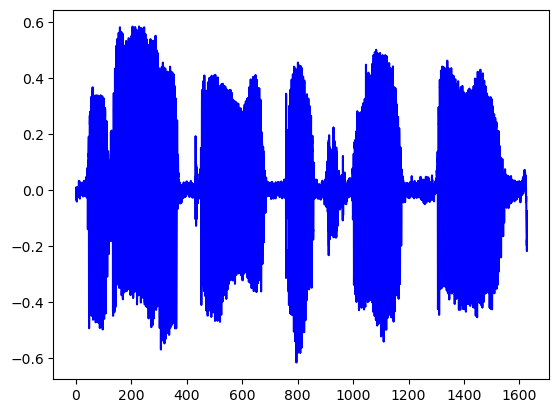

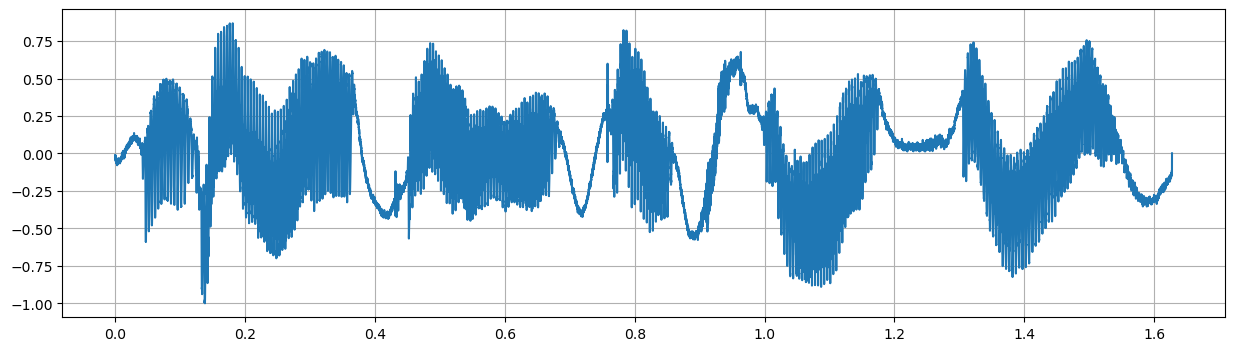

In [47]:
# Filter the data, and plot both the original and filtered signals.
y = butter_highpass_filter(x, cutoff, sr, order)
print(len(y), len(x))

time_axis = 1000 * np.arange(0, len(x), 1) / float(sr)
plt.plot(time_axis, y, color='blue')

audio = normalize_audio(x)
plt.figure(figsize=(15,4))
plt.plot(np.linspace(0, len(x) / sr, num=len(x)), x)
plt.grid(True)

## Audio Framing / Windowing


In [56]:
def frame_audio(audio, Frame_size=2048, hop_size=10, sample_rate=sr):
    #hop_size in ms
    audio = np.pad(audio, int(Frame_size/2), mode='reflect')
    hop_len=np.round(sample_rate*hop_size/1000).astype(int)
    frame_num = int((len(audio) - Frame_size) / hop_len) + 1
    frames = np.zeros((frame_num, Frame_size))
    
    for n in range(frame_num):
        frames[n] = audio[n*hop_len:n*hop_len+Frame_size]
        
    return frames

In [58]:
hop_size = 10 # in ms
Frame_size = 2048
audio_frames = frame_audio(x,Frame_size, hop_size, sample_rate = sr)
print("Framed audio shape: {0}".format(audio_frames.shape))

Framed audio shape: (163, 2048)
